# 1. 데이터 불러오기

In [2]:
import pandas as pd

# 단위 M, 자료에서 부족한 부분은 찾아서 메우기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df = df.iloc[:, 1:] # 넘버링 삭제
# df.dropna(how = 'all') # 행 전체가 결측치인 값 삭제( 해당되는 행 없음 )
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

# 2. 전처리

In [4]:
def conversion_unit_k_to_m(str): # 단위 변환 K -> M
  if isinstance(str, float): # 이미 실수 일 경우
    return str

  if str[-1] == 'K': # K로 끝날 경우
    return (float(str[:-1])) / 1000

  return str

def remove_unit_m(str): # 단위 삭제 remove M
  if isinstance(str, float): # 이미 실수 일 경우
    return str
    
  if str[-1] == 'M': # M로 끝날 경우
    return float(str[:-1])

  return str

In [5]:
# NA_Sales 데이터를 float64으로 형 변환
df['NA_Sales'] = df['NA_Sales'].apply(conversion_unit_k_to_m)
df['NA_Sales'] = df['NA_Sales'].apply(remove_unit_m)
df = df.astype({'NA_Sales': 'float'})

# EU_Sales 데이터를 float64으로 형 변환
df['EU_Sales'] = df['EU_Sales'].apply(conversion_unit_k_to_m)
df['EU_Sales'] = df['EU_Sales'].apply(remove_unit_m)
df = df.astype({'EU_Sales': 'float'})

# JP_Sales 데이터를 float64으로 형 변환
df['JP_Sales'] = df['JP_Sales'].apply(conversion_unit_k_to_m)
df['JP_Sales'] = df['JP_Sales'].apply(remove_unit_m)
df = df.astype({'JP_Sales': 'float'})

# Other_Sales 데이터를 float64으로 형 변환
df['Other_Sales'] = df['Other_Sales'].apply(conversion_unit_k_to_m)
df['Other_Sales'] = df['Other_Sales'].apply(remove_unit_m)
df = df.astype({'Other_Sales': 'float'})

df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [6]:
def year_setting(year): # 2009년 출시작인데 9로 표기된 경우 2009로 변경, 결측치는 그대로 둠.
  if year == 'NaN':
    return year

  if year < 22:
    return year + 2000

  if year < 100: # 20세기
    return year + 1900

  return year

In [7]:
# 날짜 표기 오류 수정
df['Year'] = df['Year'].apply(year_setting)

In [8]:
df.groupby('Year').size()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
dtype: int64

In [9]:
# 가장 오래된 게임과 가장 최근 게임은 데이터가 부족해서 행 삭제
idx_year = df[df['Year'] == 1980].index
df = df.drop(idx_year)

idx_year = df[df['Year'] == 2017].index
df = df.drop(idx_year)

idx_year = df[df['Year'] == 2020].index
df = df.drop(idx_year)

In [10]:
df.isnull().sum() # 결측치 확인

Name             0
Platform         0
Year           271
Genre           49
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
# 중복 값 확인
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [12]:
# 중복 값 삭제
df = df[~df.duplicated()]

## 2.1 데이터 확인 및 컬럼 추가

In [13]:
# Data Description
# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [14]:
df['NA_Sales'].sum()
# 북미지역 게임 시장 규모

4382.089999999999

In [15]:
df['EU_Sales'].sum()
# 유럽지역 게임 시장 규모

2433.46

In [16]:
df['JP_Sales'].sum()
# 일본지역 게임 시장 규모

1290.95

In [17]:
df['Other_Sales'].sum()
# 기타지역 게임 시장 규모
# 어째서 일본 보다 작지? 중국이 포함 되지 않은 데이터인가?

# 게임 시장 규모는 중국이 1위이다.
# 출처 : https://yimjang.tistory.com/entry/Global-Games-Market

797.61

In [18]:
df['NA_Sales'].sum() + df['EU_Sales'].sum() + df['JP_Sales'].sum() + df['Other_Sales'].sum()

8904.109999999999

In [19]:
# 데이터 셋의 판매량을 모두 합하면 89억 410만장
# 게임 한 장 당 2.4만원으로 계산하면 213조 6984억원으로 실제 세계 게임시장 규모와 비슷하다.
# 실제 게임 한 장 당 가격은 알 수 없지만 1.5만원은 무조건 넘을 것이라고 예상되기 때문에(1.5만원은 인기 있는 게임이라면 매우 파격적인 가격이기 때문)
# 전 세계 게임 판매량에 최소 50% 이상의 데이터가 있다고 예상 됨.

# 조사 결과 2019년 세계 게임시장 규모는 2018년 대비 5% 증가한 1864억9100만달러(217조3832억원, 한국은행 2019년 연평균 매매기준율 적용)로 집계됐다.
# 출처 : http://it.chosun.com/site/data/html_dir/2020/12/21/2020122101618.html

In [20]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] # 총 판매 수 칼럼 생성

In [21]:
#랭킹용 df 생성
df_ranking = df.groupby(['Name']).agg('sum')
df_ranking = df_ranking.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [22]:
df_ranking['Sales_Ranking'] = df_ranking['Total_Sales'].rank(ascending=False)   # ascending=False : 내림차순, 판매 수 순위 칼럼 생성

In [23]:
df_ranking['Sales_Ranking'] = df_ranking['Sales_Ranking'].astype(int) # 소수점(동점 표현) 버림
df_ranking = df_ranking.sort_values(by='Sales_Ranking') # 정렬
df_ranking = df_ranking.reset_index() # 인덱스 리셋
df_ranking.head(10)

,Name,Total_Sales,Sales_Ranking
0,Wii Sports,82.74,1
1,Grand Theft Auto V,55.92,2
2,Super Mario Bros.,45.31,3
3,Tetris,35.84,4
4,Mario Kart Wii,35.83,5
5,Wii Sports Resort,33.00,6
6,Pokemon Red/Pokemon Blue,31.38,7
7,Call of Duty: Black Ops,31.04,8
8,Call of Duty: Modern Warfare 3,30.84,9
9,New Super Mario Bros.,30.01,10


In [24]:
# 데이터 셋에서 판매량 1위인 Wii Sports를 보면 단위는 100만장으로 보인다. 

# With approximately 82.9 million units sold, Wii Sports was the top selling Wii game of all time as of March 2021.
# 출처 : https://www.statista.com/statistics/248204/top-selling-nintendo-wii-titles-worldwide/

# 명백히 장르가 스포츠인 NBA 2K11 라는 게임이 액션으로 분류되어 있기도 함.

In [25]:
# 지역별 판매량 분석을 위한 tidy 데이터 만들기
tidy_df = df.drop(['Total_Sales'], axis = 1)
tidy_df = tidy_df.melt(id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'], value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
tidy_df

,Name,Platform,Year,Genre,Publisher,variable,value
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,NA_Sales,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,NA_Sales,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,NA_Sales,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,NA_Sales,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,NA_Sales,0.12
...,...,...,...,...,...,...,...
66331,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,Other_Sales,0.01
66332,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,Other_Sales,0.00
66333,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,Other_Sales,0.13
66334,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,Other_Sales,0.03


In [26]:
# 하이픈을 변수명으로 사용 할 수 없어서 번거로움으로 언더바로 변경
tidy_df.loc[(tidy_df.Genre == 'Role-Playing'),'Genre']='Role_Playing'
df.loc[(df.Genre == 'Role-Playing'),'Genre']='Role_Playing'

In [27]:
# 데이터 내보내기
df.to_csv('E:\\codestates\\game_data.csv', sep=',')

# 3. 데이터 분석

In [28]:
# 데이터 분석 목표
# 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 4. 위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [29]:
Genre_df = df.dropna(subset=['Genre']) # 장르의 결측치를 제거한 df 생성

Genre_df['Genre'].describe()
# 장르 데이터 총 11455개, 장르 구분 12가지, 제일 많은 게임 장르는 Action(1913개)

count      16535
unique        12
top       Action
freq        3303
Name: Genre, dtype: object

In [30]:
pie_data = Genre_df.groupby(Genre_df['Genre']).size() # 장르 별 게임 수
pie_data = pie_data.sort_values(ascending=False) # 정렬
pie_data
# 1위 액션, 2위 스포츠, 3위 기타, 4위 롤플레잉, 5위 어드벤쳐, 6위 슈팅, 7위 레이싱, 8위 시뮬레이션, 9위 대전 격투, 10위 플랫포머, 11위 전략, 12위 퍼즐

Genre
Action          3303
Sports          2341
Misc            1730
Role_Playing    1481
Shooter         1305
Adventure       1280
Racing          1243
Platform         884
Simulation       864
Fighting         846
Strategy         680
Puzzle           578
dtype: int64

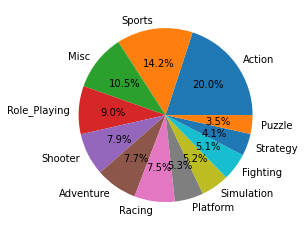

In [31]:
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

plt.pie(pie_data, labels=pie_data.index, autopct='%.1f%%')
plt.show()

## 3.1 지역에 따른 게임 장르 선호도

In [32]:
# 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

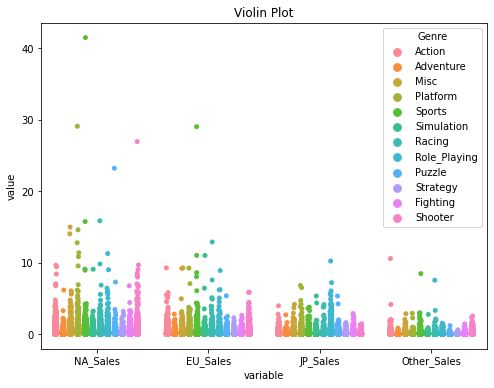

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
sns.stripplot(x="variable", y="value", hue="Genre", data=tidy_df, jitter=True, dodge=True)
plt.title("Violin Plot")
plt.show()
# 북미는 스포츠, 유럽은 스포츠, 일본은 롤플레잉, 기타는 스포츠와 액션이 인기 있다.

In [34]:
NA_Sum = df['NA_Sales'].sum() # 북미지역 판매량 합계
EU_Sum = df['EU_Sales'].sum() # 유럽지역 판매량 합계
JP_Sum = df['JP_Sales'].sum() # 일본지역 판매량 합계
Other_Sum = df['Other_Sales'].sum() # 기타지역 판매량 합계
Total_Sum = NA_Sum + EU_Sum + JP_Sum + Other_Sum # 판매량 총계
NA_Ratio = NA_Sum / Total_Sum # 총계 중 북미지역 비율
EU_Ratio = EU_Sum / Total_Sum # 총계 중 북미지역 비율
JP_Ratio = JP_Sum / Total_Sum # 총계 중 북미지역 비율
Other_Ratio = Other_Sum / Total_Sum # 총계 중 북미지역 비율

NA_Ratio, EU_Ratio, JP_Ratio, Other_Ratio
# 북미지역이 49.21%, 유럽지역이 27.32%, 일본지역이 14.49%, 기타지역이 8.95%의 게임을 구입한다.

(0.4921423926703511,
 0.27329626430940324,
 0.14498360869306423,
 0.08957773432718151)

### 3.1.1 추가 전처리

In [35]:
# 스포츠 장르만 필터링
is_Sports = tidy_df['Genre'] == 'Sports'
Sports = tidy_df[is_Sports]
# 스포츠 장르 판매량 합계
Sports_Sum = Sports['value'].sum()

# 플랫포머 장르만 필터링
is_Platform = tidy_df['Genre'] == 'Platform'
Platform = tidy_df[is_Platform]
# 플랫포머 장르 판매량 합계
Platform_Sum = Platform['value'].sum()

# 레이싱 장르만 필터링
is_Racing = tidy_df['Genre'] == 'Racing'
Racing = tidy_df[is_Racing]
# 레이싱 장르 판매량 합계
Racing_Sum = Racing['value'].sum()

# 롤플레잉 장르만 필터링
is_Role_Playing = tidy_df['Genre'] == 'Role_Playing'
Role_Playing = tidy_df[is_Role_Playing]
# 롤플레잉 장르 판매량 합계
Role_Playing_Sum = Role_Playing['value'].sum()

# 퍼즐 장르만 필터링
is_Puzzle = tidy_df['Genre'] == 'Puzzle'
Puzzle = tidy_df[is_Puzzle]
# 퍼즐 장르 판매량 합계
Puzzle_Sum = Puzzle['value'].sum()

# 기타 장르만 필터링
is_Misc = tidy_df['Genre'] == 'Misc'
Misc = tidy_df[is_Misc]
# 기타 장르 판매량 합계
Misc_Sum = Misc['value'].sum()

# 슈팅 장르만 필터링
is_Shooter = tidy_df['Genre'] == 'Shooter'
Shooter = tidy_df[is_Shooter]
# 슈팅 장르 판매량 합계
Shooter_Sum = Shooter['value'].sum()

# 시뮬레이션 장르만 필터링
is_Simulation = tidy_df['Genre'] == 'Simulation'
Simulation = tidy_df[is_Simulation]
# 시뮬레이션 장르 판매량 합계
Simulation_Sum = Simulation['value'].sum()

# 액션 장르만 필터링
is_Action = tidy_df['Genre'] == 'Action'
Action = tidy_df[is_Action]
# 액션 장르 판매량 합계
Action_Sum = Action['value'].sum()

# 대전 격투 장르만 필터링
is_Fighting = tidy_df['Genre'] == 'Fighting'
Fighting = tidy_df[is_Fighting]
# 대전 격투 장르 판매량 합계
Fighting_Sum = Fighting['value'].sum()

# 어드벤쳐 장르만 필터링
is_Adventure = tidy_df['Genre'] == 'Adventure'
Adventure = tidy_df[is_Adventure]
# 어드벤쳐 장르 판매량 합계
Adventure_Sum = Adventure['value'].sum()

# 전략 장르만 필터링
is_Strategy = tidy_df['Genre'] == 'Strategy'
Strategy = tidy_df[is_Strategy]
# 전략 장르 판매량 합계
Strategy_Sum = Strategy['value'].sum()

In [36]:
# 북미 판매량만 필터링
is_NA_Sales = tidy_df['variable'] == 'NA_Sales'
NA_Sales = tidy_df[is_NA_Sales]

# 북미 판매량 중 스포츠 장르만 필터링
is_NA_Sales_Sports = NA_Sales['Genre'] == 'Sports'
NA_Sales_Sports = NA_Sales[is_NA_Sales_Sports]
# 북미 판매량 중 스포츠 장르 판매량 합계
NA_Sales_Sports_Sum = NA_Sales_Sports['value'].sum()

# 북미 판매량 중 플랫포머 장르만 필터링
is_NA_Sales_Platform = NA_Sales['Genre'] == 'Platform'
NA_Sales_Platform = NA_Sales[is_NA_Sales_Platform]
# 북미 판매량 중 플랫포머 장르 판매량 합계
NA_Sales_Platform_Sum = NA_Sales_Platform['value'].sum()

# 북미 판매량 중 레이싱 장르만 필터링
is_NA_Sales_Racing = NA_Sales['Genre'] == 'Racing'
NA_Sales_Racing = NA_Sales[is_NA_Sales_Racing]
# 북미 판매량 중 레이싱 장르 판매량 합계
NA_Sales_Racing_Sum = NA_Sales_Racing['value'].sum()

# 북미 판매량 중 롤플레잉 장르만 필터링
is_NA_Sales_Role_Playing = NA_Sales['Genre'] == 'Role_Playing'
NA_Sales_Role_Playing = NA_Sales[is_NA_Sales_Role_Playing]
# 북미 판매량 중 롤플레잉 장르 판매량 합계
NA_Sales_Role_Playing_Sum = NA_Sales_Role_Playing['value'].sum()

# 북미 판매량 중 퍼즐 장르만 필터링
is_NA_Sales_Puzzle = NA_Sales['Genre'] == 'Puzzle'
NA_Sales_Puzzle = NA_Sales[is_NA_Sales_Puzzle]
# 북미 판매량 중 퍼즐 장르 판매량 합계
NA_Sales_Puzzle_Sum = NA_Sales_Puzzle['value'].sum()

# 북미 판매량 중 기타 장르만 필터링
is_NA_Sales_Misc = NA_Sales['Genre'] == 'Misc'
NA_Sales_Misc = NA_Sales[is_NA_Sales_Misc]
# 북미 판매량 중 기타 장르 판매량 합계
NA_Sales_Misc_Sum = NA_Sales_Misc['value'].sum()

# 북미 판매량 중 슈팅 장르만 필터링
is_NA_Sales_Shooter = NA_Sales['Genre'] == 'Shooter'
NA_Sales_Shooter = NA_Sales[is_NA_Sales_Shooter]
# 북미 판매량 중 슈팅 장르 판매량 합계
NA_Sales_Shooter_Sum = NA_Sales_Shooter['value'].sum()

# 북미 판매량 중 시뮬레이션 장르만 필터링
is_NA_Sales_Simulation = NA_Sales['Genre'] == 'Simulation'
NA_Sales_Simulation = NA_Sales[is_NA_Sales_Simulation]
# 북미 판매량 중 시뮬레이션 장르 판매량 합계
NA_Sales_Simulation_Sum = NA_Sales_Simulation['value'].sum()

# 북미 판매량 중 액션 장르만 필터링
is_NA_Sales_Action = NA_Sales['Genre'] == 'Action'
NA_Sales_Action = NA_Sales[is_NA_Sales_Action]
# 북미 판매량 중 액션 장르 판매량 합계
NA_Sales_Action_Sum = NA_Sales_Action['value'].sum()

# 북미 판매량 중 대전_격투 장르만 필터링
is_NA_Sales_Fighting = NA_Sales['Genre'] == 'Fighting'
NA_Sales_Fighting = NA_Sales[is_NA_Sales_Fighting]
# 북미 판매량 중 대전_격투 장르 판매량 합계
NA_Sales_Fighting_Sum = NA_Sales_Fighting['value'].sum()

# 북미 판매량 중 어드벤쳐 장르만 필터링
is_NA_Sales_Adventure = NA_Sales['Genre'] == 'Adventure'
NA_Sales_Adventure = NA_Sales[is_NA_Sales_Adventure]
# 북미 판매량 중 어드벤쳐 장르 판매량 합계
NA_Sales_Adventure_Sum = NA_Sales_Adventure['value'].sum()

# 북미 판매량 중 전략 장르만 필터링
is_NA_Sales_Strategy = NA_Sales['Genre'] == 'Strategy'
NA_Sales_Strategy = NA_Sales[is_NA_Sales_Strategy]
# 북미 판매량 중 전략 장르 판매량 합계
NA_Sales_Strategy_Sum = NA_Sales_Strategy['value'].sum()

In [37]:
# 유럽 판매량만 필터링
is_EU_Sales = tidy_df['variable'] == 'EU_Sales'
EU_Sales = tidy_df[is_EU_Sales]


# 유럽 판매량 중 스포츠 장르만 필터링
is_EU_Sales_Sports = EU_Sales['Genre'] == 'Sports'
EU_Sales_Sports = EU_Sales[is_EU_Sales_Sports]
# 유럽 판매량 중 스포츠 장르 판매량 합계
EU_Sales_Sports_Sum = EU_Sales_Sports['value'].sum()

# 유럽 판매량 중 플랫포머 장르만 필터링
is_EU_Sales_Platform = EU_Sales['Genre'] == 'Platform'
EU_Sales_Platform = EU_Sales[is_EU_Sales_Platform]
# 유럽 판매량 중 플랫포머 장르 판매량 합계
EU_Sales_Platform_Sum = EU_Sales_Platform['value'].sum()

# 유럽 판매량 중 레이싱 장르만 필터링
is_EU_Sales_Racing = EU_Sales['Genre'] == 'Racing'
EU_Sales_Racing = EU_Sales[is_EU_Sales_Racing]
# 유럽 판매량 중 레이싱 장르 판매량 합계
EU_Sales_Racing_Sum = EU_Sales_Racing['value'].sum()

# 유럽 판매량 중 롤플레잉 장르만 필터링
is_EU_Sales_Role_Playing = EU_Sales['Genre'] == 'Role_Playing'
EU_Sales_Role_Playing = EU_Sales[is_EU_Sales_Role_Playing]
# 유럽 판매량 중 롤플레잉 장르 판매량 합계
EU_Sales_Role_Playing_Sum = EU_Sales_Role_Playing['value'].sum()

# 유럽 판매량 중 퍼즐 장르만 필터링
is_EU_Sales_Puzzle = EU_Sales['Genre'] == 'Puzzle'
EU_Sales_Puzzle = EU_Sales[is_EU_Sales_Puzzle]
# 유럽 판매량 중 퍼즐 장르 판매량 합계
EU_Sales_Puzzle_Sum = EU_Sales_Puzzle['value'].sum()

# 유럽 판매량 중 기타 장르만 필터링
is_EU_Sales_Misc = EU_Sales['Genre'] == 'Misc'
EU_Sales_Misc = EU_Sales[is_EU_Sales_Misc]
# 유럽 판매량 중 기타 장르 판매량 합계
EU_Sales_Misc_Sum = EU_Sales_Misc['value'].sum()

# 유럽 판매량 중 슈팅 장르만 필터링
is_EU_Sales_Shooter = EU_Sales['Genre'] == 'Shooter'
EU_Sales_Shooter = EU_Sales[is_EU_Sales_Shooter]
# 유럽 판매량 중 슈팅 장르 판매량 합계
EU_Sales_Shooter_Sum = EU_Sales_Shooter['value'].sum()

# 유럽 판매량 중 시뮬레이션 장르만 필터링
is_EU_Sales_Simulation = EU_Sales['Genre'] == 'Simulation'
EU_Sales_Simulation = EU_Sales[is_EU_Sales_Simulation]
# 유럽 판매량 중 시뮬레이션 장르 판매량 합계
EU_Sales_Simulation_Sum = EU_Sales_Simulation['value'].sum()

# 유럽 판매량 중 액션 장르만 필터링
is_EU_Sales_Action = EU_Sales['Genre'] == 'Action'
EU_Sales_Action = EU_Sales[is_EU_Sales_Action]
# 유럽 판매량 중 액션 장르 판매량 합계
EU_Sales_Action_Sum = EU_Sales_Action['value'].sum()

# 유럽 판매량 중 대전 격투 장르만 필터링
is_EU_Sales_Fighting = EU_Sales['Genre'] == 'Fighting'
EU_Sales_Fighting = EU_Sales[is_EU_Sales_Fighting]
# 유럽 판매량 중 대전 격투 장르 판매량 합계
EU_Sales_Fighting_Sum = EU_Sales_Fighting['value'].sum()

# 유럽 판매량 중 어드벤쳐 장르만 필터링
is_EU_Sales_Adventure = EU_Sales['Genre'] == 'Adventure'
EU_Sales_Adventure = EU_Sales[is_EU_Sales_Adventure]
# 유럽 판매량 중 어드벤쳐 장르 판매량 합계
EU_Sales_Adventure_Sum = EU_Sales_Adventure['value'].sum()

# 유럽 판매량 중 전략 장르만 필터링
is_EU_Sales_Strategy = EU_Sales['Genre'] == 'Strategy'
EU_Sales_Strategy = EU_Sales[is_EU_Sales_Strategy]
# 유럽 판매량 중 전략 장르 판매량 합계
EU_Sales_Strategy_Sum = EU_Sales_Strategy['value'].sum()

In [38]:
# 일본 판매량만 필터링
is_JP_Sales = tidy_df['variable'] == 'JP_Sales'
JP_Sales = tidy_df[is_JP_Sales]


# 일본 판매량 중 스포츠 장르만 필터링
is_JP_Sales_Sports = JP_Sales['Genre'] == 'Sports'
JP_Sales_Sports = JP_Sales[is_JP_Sales_Sports]
# 일본 판매량 중 스포츠 장르 판매량 합계
JP_Sales_Sports_Sum = JP_Sales_Sports['value'].sum()

# 일본 판매량 중 스포츠 장르만 필터링
is_JP_Sales_Platform = JP_Sales['Genre'] == 'Platform'
JP_Sales_Platform = JP_Sales[is_JP_Sales_Platform]
# 일본 판매량 중 스포츠 장르 판매량 합계
JP_Sales_Platform_Sum = JP_Sales_Platform['value'].sum()

# 일본 판매량 중 레이싱 장르만 필터링
is_JP_Sales_Racing = JP_Sales['Genre'] == 'Racing'
JP_Sales_Racing = JP_Sales[is_JP_Sales_Racing]
# 일본 판매량 중 레이싱 장르 판매량 합계
JP_Sales_Racing_Sum = JP_Sales_Racing['value'].sum()

# 일본 판매량 중 롤플레잉 장르만 필터링
is_JP_Sales_Role_Playing = JP_Sales['Genre'] == 'Role_Playing'
JP_Sales_Role_Playing = JP_Sales[is_JP_Sales_Role_Playing]
# 일본 판매량 중 롤플레잉 장르 판매량 합계
JP_Sales_Role_Playing_Sum = JP_Sales_Role_Playing['value'].sum()

# 일본 판매량 중 퍼즐 장르만 필터링
is_JP_Sales_Puzzle = JP_Sales['Genre'] == 'Puzzle'
JP_Sales_Puzzle = JP_Sales[is_JP_Sales_Puzzle]
# 일본 판매량 중 퍼즐 장르 판매량 합계
JP_Sales_Puzzle_Sum = JP_Sales_Puzzle['value'].sum()

# 일본 판매량 중 기타 장르만 필터링
is_JP_Sales_Misc = JP_Sales['Genre'] == 'Misc'
JP_Sales_Misc = JP_Sales[is_JP_Sales_Misc]
# 일본 판매량 중 기타 장르 판매량 합계
JP_Sales_Misc_Sum = JP_Sales_Misc['value'].sum()

# 일본 판매량 중 슈팅 장르만 필터링
is_JP_Sales_Shooter = JP_Sales['Genre'] == 'Shooter'
JP_Sales_Shooter = JP_Sales[is_JP_Sales_Shooter]
# 일본 판매량 중 슈팅 장르 판매량 합계
JP_Sales_Shooter_Sum = JP_Sales_Shooter['value'].sum()

# 일본 판매량 중 시뮬레이션 장르만 필터링
is_JP_Sales_Simulation = JP_Sales['Genre'] == 'Simulation'
JP_Sales_Simulation = JP_Sales[is_JP_Sales_Simulation]
# 일본 판매량 중 시뮬레이션 장르 판매량 합계
JP_Sales_Simulation_Sum = JP_Sales_Simulation['value'].sum()

# 일본 판매량 중 액션 장르만 필터링
is_JP_Sales_Action = JP_Sales['Genre'] == 'Action'
JP_Sales_Action = JP_Sales[is_JP_Sales_Action]
# 일본 판매량 중 액션 장르 판매량 합계
JP_Sales_Action_Sum = JP_Sales_Action['value'].sum()

# 일본 판매량 중 대전_격투 장르만 필터링
is_JP_Sales_Fighting = JP_Sales['Genre'] == 'Fighting'
JP_Sales_Fighting = JP_Sales[is_JP_Sales_Fighting]
# 일본 판매량 중 대전_격투 장르 판매량 합계
JP_Sales_Fighting_Sum = JP_Sales_Fighting['value'].sum()

# 일본 판매량 중 어드벤쳐 장르만 필터링
is_JP_Sales_Adventure = JP_Sales['Genre'] == 'Adventure'
JP_Sales_Adventure = JP_Sales[is_JP_Sales_Adventure]
# 일본 판매량 중 어드벤쳐 장르 판매량 합계
JP_Sales_Adventure_Sum = JP_Sales_Adventure['value'].sum()

# 일본 판매량 중 전략 장르만 필터링
is_JP_Sales_Strategy = JP_Sales['Genre'] == 'Strategy'
JP_Sales_Strategy = JP_Sales[is_JP_Sales_Strategy]
# 일본 판매량 중 전략 장르 판매량 합계
JP_Sales_Strategy_Sum = JP_Sales_Strategy['value'].sum()

In [39]:
# 기타 판매량만 필터링
is_Other_Sales = tidy_df['variable'] == 'Other_Sales'
Other_Sales = tidy_df[is_Other_Sales]


# 기타 판매량 중 스포츠 장르만 필터링
is_Other_Sales_Sports = Other_Sales['Genre'] == 'Sports'
Other_Sales_Sports = Other_Sales[is_Other_Sales_Sports]
# 기타 판매량 중 스포츠 장르 판매량 합계
Other_Sales_Sports_Sum = Other_Sales_Sports['value'].sum()

# 기타 판매량 중 플랫포머 장르만 필터링
is_Other_Sales_Platform = Other_Sales['Genre'] == 'Platform'
Other_Sales_Platform = Other_Sales[is_Other_Sales_Platform]
# 기타 판매량 중 플랫포머 장르 판매량 합계
Other_Sales_Platform_Sum = Other_Sales_Platform['value'].sum()

# 기타 판매량 중 레이싱 장르만 필터링
is_Other_Sales_Racing = Other_Sales['Genre'] == 'Racing'
Other_Sales_Racing = Other_Sales[is_Other_Sales_Racing]
# 기타 판매량 중 레이싱 장르 판매량 합계
Other_Sales_Racing_Sum = Other_Sales_Racing['value'].sum()

# 기타 판매량 중 롤플레잉 장르만 필터링
is_Other_Sales_Role_Playing = Other_Sales['Genre'] == 'Role_Playing'
Other_Sales_Role_Playing = Other_Sales[is_Other_Sales_Role_Playing]
# 기타 판매량 중 롤플레잉 장르 판매량 합계
Other_Sales_Role_Playing_Sum = Other_Sales_Role_Playing['value'].sum()

# 기타 판매량 중 퍼즐 장르만 필터링
is_Other_Sales_Puzzle = Other_Sales['Genre'] == 'Puzzle'
Other_Sales_Puzzle = Other_Sales[is_Other_Sales_Puzzle]
# 기타 판매량 중 퍼즐 장르 판매량 합계
Other_Sales_Puzzle_Sum = Other_Sales_Puzzle['value'].sum()

# 기타 판매량 중 기타 장르만 필터링
is_Other_Sales_Misc = Other_Sales['Genre'] == 'Misc'
Other_Sales_Misc = Other_Sales[is_Other_Sales_Misc]
# 기타 판매량 중 기타 장르 판매량 합계
Other_Sales_Misc_Sum = Other_Sales_Misc['value'].sum()

# 슈팅 판매량 중 슈팅 장르만 필터링
is_Other_Sales_Shooter = Other_Sales['Genre'] == 'Shooter'
Other_Sales_Shooter = Other_Sales[is_Other_Sales_Shooter]
# 슈팅 판매량 중 슈팅 장르 판매량 합계
Other_Sales_Shooter_Sum = Other_Sales_Shooter['value'].sum()

# 시뮬레이션 판매량 중 시뮬레이션 장르만 필터링
is_Other_Sales_Simulation = Other_Sales['Genre'] == 'Simulation'
Other_Sales_Simulation = Other_Sales[is_Other_Sales_Simulation]
# 시뮬레이션 판매량 중 시뮬레이션 장르 판매량 합계
Other_Sales_Simulation_Sum = Other_Sales_Simulation['value'].sum()

# 액션 판매량 중 액션 장르만 필터링
is_Other_Sales_Action = Other_Sales['Genre'] == 'Action'
Other_Sales_Action = Other_Sales[is_Other_Sales_Action]
# 액션 판매량 중 액션 장르 판매량 합계
Other_Sales_Action_Sum = Other_Sales_Action['value'].sum()

# 대전_격투 판매량 중 대전_격투 장르만 필터링
is_Other_Sales_Fighting = Other_Sales['Genre'] == 'Fighting'
Other_Sales_Fighting = Other_Sales[is_Other_Sales_Fighting]
# 대전_격투 판매량 중 대전_격투 장르 판매량 합계
Other_Sales_Fighting_Sum = Other_Sales_Fighting['value'].sum()

# 어드벤쳐 판매량 중 어드벤쳐 장르만 필터링
is_Other_Sales_Adventure = Other_Sales['Genre'] == 'Adventure'
Other_Sales_Adventure = Other_Sales[is_Other_Sales_Adventure]
# 어드벤쳐 판매량 중 어드벤쳐 장르 판매량 합계
Other_Sales_Adventure_Sum = Other_Sales_Adventure['value'].sum()

# 전략 판매량 중 전략 장르만 필터링
is_Other_Sales_Strategy = Other_Sales['Genre'] == 'Strategy'
Other_Sales_Strategy = Other_Sales[is_Other_Sales_Strategy]
# 전략 판매량 중 전략 장르 판매량 합계
Other_Sales_Strategy_Sum = Other_Sales_Strategy['value'].sum()

In [40]:
NA_Sales_Sports_Ratio = NA_Sales_Sports_Sum / Sports_Sum # 스포츠 장르 총계 중 북미지역 비율
EU_Sales_Sports_Ratio = EU_Sales_Sports_Sum / Sports_Sum # 스포츠 장르 총계 중 유럽지역 비율
JP_Sales_Sports_Ratio = JP_Sales_Sports_Sum / Sports_Sum # 스포츠 장르 총계 중 일본지역 비율
Other_Sales_Sports_Ratio = Other_Sales_Sports_Sum / Sports_Sum # 스포츠 장르 총계 중 기타지역 비율

NA_Sales_Platform_Ratio = NA_Sales_Platform_Sum / Platform_Sum # 플랫포머 장르 총계 중 북미지역 비율
EU_Sales_Platform_Ratio = EU_Sales_Platform_Sum / Platform_Sum # 플랫포머 장르 총계 중 유럽지역 비율
JP_Sales_Platform_Ratio = JP_Sales_Platform_Sum / Platform_Sum # 플랫포머 장르 총계 중 일본지역 비율
Other_Sales_Platform_Ratio = Other_Sales_Platform_Sum / Platform_Sum # 플랫포머 장르 총계 중 기타지역 비율

NA_Sales_Racing_Ratio = NA_Sales_Racing_Sum / Racing_Sum # 레이싱 장르 총계 중 북미지역 비율
EU_Sales_Racing_Ratio = EU_Sales_Racing_Sum / Racing_Sum # 레이싱 장르 총계 중 유럽지역 비율
JP_Sales_Racing_Ratio = JP_Sales_Racing_Sum / Racing_Sum # 레이싱 장르 총계 중 일본지역 비율
Other_Sales_Racing_Ratio = Other_Sales_Racing_Sum / Racing_Sum # 레이싱 장르 총계 중 기타지역 비율

NA_Sales_Role_Playing_Ratio = NA_Sales_Role_Playing_Sum / Role_Playing_Sum # 롤플레잉 장르 총계 중 북미지역 비율
EU_Sales_Role_Playing_Ratio = EU_Sales_Role_Playing_Sum / Role_Playing_Sum # 롤플레잉 장르 총계 중 유럽지역 비율
JP_Sales_Role_Playing_Ratio = JP_Sales_Role_Playing_Sum / Role_Playing_Sum # 롤플레잉 장르 총계 중 일본지역 비율
Other_Sales_Role_Playing_Ratio = Other_Sales_Role_Playing_Sum / Role_Playing_Sum # 롤플레잉 장르 총계 중 기타지역 비율

NA_Sales_Puzzle_Ratio = NA_Sales_Puzzle_Sum / Puzzle_Sum # 퍼즐 장르 총계 중 북미지역 비율
EU_Sales_Puzzle_Ratio = EU_Sales_Puzzle_Sum / Puzzle_Sum # 퍼즐 장르 총계 중 유럽지역 비율
JP_Sales_Puzzle_Ratio = JP_Sales_Puzzle_Sum / Puzzle_Sum # 퍼즐 장르 총계 중 일본지역 비율
Other_Sales_Puzzle_Ratio = Other_Sales_Puzzle_Sum / Puzzle_Sum # 퍼즐 장르 총계 중 기타지역 비율

NA_Sales_Misc_Ratio = NA_Sales_Misc_Sum / Misc_Sum # 기타 장르 총계 중 북미지역 비율
EU_Sales_Misc_Ratio = EU_Sales_Misc_Sum / Misc_Sum # 기타 장르 총계 중 유럽지역 비율
JP_Sales_Misc_Ratio = JP_Sales_Misc_Sum / Misc_Sum # 기타 장르 총계 중 일본지역 비율
Other_Sales_Misc_Ratio = Other_Sales_Misc_Sum / Misc_Sum # 기타 장르 총계 중 기타지역 비율

NA_Sales_Shooter_Ratio = NA_Sales_Shooter_Sum / Shooter_Sum # 슈팅 장르 총계 중 북미지역 비율
EU_Sales_Shooter_Ratio = EU_Sales_Shooter_Sum / Shooter_Sum # 슈팅 장르 총계 중 유럽지역 비율
JP_Sales_Shooter_Ratio = JP_Sales_Shooter_Sum / Shooter_Sum # 슈팅 장르 총계 중 일본지역 비율
Other_Sales_Shooter_Ratio = Other_Sales_Shooter_Sum / Shooter_Sum # 슈팅 장르 총계 중 슈팅지역 비율

NA_Sales_Simulation_Ratio = NA_Sales_Simulation_Sum / Simulation_Sum # 시뮬레이션 장르 총계 중 북미지역 비율
EU_Sales_Simulation_Ratio = EU_Sales_Simulation_Sum / Simulation_Sum # 시뮬레이션 장르 총계 중 유럽지역 비율
JP_Sales_Simulation_Ratio = JP_Sales_Simulation_Sum / Simulation_Sum # 시뮬레이션 장르 총계 중 일본지역 비율
Other_Sales_Simulation_Ratio = Other_Sales_Simulation_Sum / Simulation_Sum # 시뮬레이션 장르 총계 중 시뮬레이션지역 비율

NA_Sales_Action_Ratio = NA_Sales_Action_Sum / Action_Sum # 액션 장르 총계 중 북미지역 비율
EU_Sales_Action_Ratio = EU_Sales_Action_Sum / Action_Sum # 액션 장르 총계 중 유럽지역 비율
JP_Sales_Action_Ratio = JP_Sales_Action_Sum / Action_Sum # 액션 장르 총계 중 일본지역 비율
Other_Sales_Action_Ratio = Other_Sales_Action_Sum / Action_Sum # 액션 장르 총계 중 액션지역 비율

NA_Sales_Fighting_Ratio = NA_Sales_Fighting_Sum / Fighting_Sum # 대전_격투 장르 총계 중 북미지역 비율
EU_Sales_Fighting_Ratio = EU_Sales_Fighting_Sum / Fighting_Sum # 대전_격투 장르 총계 중 유럽지역 비율
JP_Sales_Fighting_Ratio = JP_Sales_Fighting_Sum / Fighting_Sum # 대전_격투 장르 총계 중 일본지역 비율
Other_Sales_Fighting_Ratio = Other_Sales_Fighting_Sum / Fighting_Sum # 대전_격투 장르 총계 중 대전_격투지역 비율

NA_Sales_Adventure_Ratio = NA_Sales_Adventure_Sum / Adventure_Sum # 어드벤쳐 장르 총계 중 북미지역 비율
EU_Sales_Adventure_Ratio = EU_Sales_Adventure_Sum / Adventure_Sum # 어드벤쳐 장르 총계 중 유럽지역 비율
JP_Sales_Adventure_Ratio = JP_Sales_Adventure_Sum / Adventure_Sum # 어드벤쳐 장르 총계 중 일본지역 비율
Other_Sales_Adventure_Ratio = Other_Sales_Adventure_Sum / Adventure_Sum # 어드벤쳐 장르 총계 중 어드벤쳐지역 비율

NA_Sales_Strategy_Ratio = NA_Sales_Strategy_Sum / Strategy_Sum # 전략 장르 총계 중 북미지역 비율
EU_Sales_Strategy_Ratio = EU_Sales_Strategy_Sum / Strategy_Sum # 전략 장르 총계 중 유럽지역 비율
JP_Sales_Strategy_Ratio = JP_Sales_Strategy_Sum / Strategy_Sum # 전략 장르 총계 중 일본지역 비율
Other_Sales_Strategy_Ratio = Other_Sales_Strategy_Sum / Strategy_Sum # 전략 장르 총계 중 전략지역 비율

In [41]:
# 0이면 전혀 구입 안 함, 1이면 다른 장르만큼 구입함, 1이상이면 다른 장르 보다 더 구입 함.
NA_Sales_Sports_More_Ratio = NA_Sales_Sports_Ratio / NA_Ratio # 북미지역에서 스포츠 장르 인기
EU_Sales_Sports_More_Ratio = EU_Sales_Sports_Ratio / EU_Ratio # 유럽지역에서 스포츠 장르 인기
JP_Sales_Sports_More_Ratio = JP_Sales_Sports_Ratio / JP_Ratio # 일본지역에서 스포츠 장르 인기
Other_Sales_Sports_More_Ratio = Other_Sales_Sports_Ratio / Other_Ratio # 기타지역에서 스포츠 장르 인기

NA_Sales_Platform_More_Ratio = NA_Sales_Platform_Ratio / NA_Ratio # 북미지역에서 플랫포머 장르 인기
EU_Sales_Platform_More_Ratio = EU_Sales_Platform_Ratio / EU_Ratio # 유럽지역에서 플랫포머 장르 인기
JP_Sales_Platform_More_Ratio = JP_Sales_Platform_Ratio / JP_Ratio # 일본지역에서 플랫포머 장르 인기
Other_Sales_Platform_More_Ratio = Other_Sales_Platform_Ratio / Other_Ratio # 기타지역에서 플랫포머 장르 인기

NA_Sales_Racing_More_Ratio = NA_Sales_Racing_Ratio / NA_Ratio # 북미지역에서 레이싱 장르 인기
EU_Sales_Racing_More_Ratio = EU_Sales_Racing_Ratio / EU_Ratio # 유럽지역에서 레이싱 장르 인기
JP_Sales_Racing_More_Ratio = JP_Sales_Racing_Ratio / JP_Ratio # 일본지역에서 레이싱 장르 인기
Other_Sales_Racing_More_Ratio = Other_Sales_Racing_Ratio / Other_Ratio # 기타지역에서 레이싱 장르 인기

NA_Sales_Role_Playing_More_Ratio = NA_Sales_Role_Playing_Ratio / NA_Ratio # 북미지역에서 롤플레잉 장르 인기
EU_Sales_Role_Playing_More_Ratio = EU_Sales_Role_Playing_Ratio / EU_Ratio # 유럽지역에서 롤플레잉 장르 인기
JP_Sales_Role_Playing_More_Ratio = JP_Sales_Role_Playing_Ratio / JP_Ratio # 일본지역에서 롤플레잉 장르 인기
Other_Sales_Role_Playing_More_Ratio = Other_Sales_Role_Playing_Ratio / Other_Ratio # 기타지역에서 롤플레잉 장르 인기

NA_Sales_Puzzle_More_Ratio = NA_Sales_Puzzle_Ratio / NA_Ratio # 북미지역에서 퍼즐 장르 인기
EU_Sales_Puzzle_More_Ratio = EU_Sales_Puzzle_Ratio / EU_Ratio # 유럽지역에서 퍼즐 장르 인기
JP_Sales_Puzzle_More_Ratio = JP_Sales_Puzzle_Ratio / JP_Ratio # 일본지역에서 퍼즐 장르 인기
Other_Sales_Puzzle_More_Ratio = Other_Sales_Puzzle_Ratio / Other_Ratio # 기타지역에서 퍼즐 장르 인기

NA_Sales_Misc_More_Ratio = NA_Sales_Misc_Ratio / NA_Ratio # 북미지역에서 기타 장르 인기
EU_Sales_Misc_More_Ratio = EU_Sales_Misc_Ratio / EU_Ratio # 유럽지역에서 기타 장르 인기
JP_Sales_Misc_More_Ratio = JP_Sales_Misc_Ratio / JP_Ratio # 일본지역에서 기타 장르 인기
Other_Sales_Misc_More_Ratio = Other_Sales_Misc_Ratio / Other_Ratio # 기타지역에서 기타 장르 인기

NA_Sales_Shooter_More_Ratio = NA_Sales_Shooter_Ratio / NA_Ratio # 북미지역에서 슈팅 장르 인기
EU_Sales_Shooter_More_Ratio = EU_Sales_Shooter_Ratio / EU_Ratio # 유럽지역에서 슈팅 장르 인기
JP_Sales_Shooter_More_Ratio = JP_Sales_Shooter_Ratio / JP_Ratio # 일본지역에서 슈팅 장르 인기
Other_Sales_Shooter_More_Ratio = Other_Sales_Shooter_Ratio / Other_Ratio # 슈팅지역에서 슈팅 장르 인기

NA_Sales_Simulation_More_Ratio = NA_Sales_Simulation_Ratio / NA_Ratio # 북미지역에서 시뮬레이션 장르 인기
EU_Sales_Simulation_More_Ratio = EU_Sales_Simulation_Ratio / EU_Ratio # 유럽지역에서 시뮬레이션 장르 인기
JP_Sales_Simulation_More_Ratio = JP_Sales_Simulation_Ratio / JP_Ratio # 일본지역에서 시뮬레이션 장르 인기
Other_Sales_Simulation_More_Ratio = Other_Sales_Simulation_Ratio / Other_Ratio # 시뮬레이션지역에서 시뮬레이션 장르 인기

NA_Sales_Action_More_Ratio = NA_Sales_Action_Ratio / NA_Ratio # 북미지역에서 액션 장르 인기
EU_Sales_Action_More_Ratio = EU_Sales_Action_Ratio / EU_Ratio # 유럽지역에서 액션 장르 인기
JP_Sales_Action_More_Ratio = JP_Sales_Action_Ratio / JP_Ratio # 일본지역에서 액션 장르 인기
Other_Sales_Action_More_Ratio = Other_Sales_Action_Ratio / Other_Ratio # 액션지역에서 액션 장르 인기

NA_Sales_Fighting_More_Ratio = NA_Sales_Fighting_Ratio / NA_Ratio # 북미지역에서 대전_격투 장르 인기
EU_Sales_Fighting_More_Ratio = EU_Sales_Fighting_Ratio / EU_Ratio # 유럽지역에서 대전_격투 장르 인기
JP_Sales_Fighting_More_Ratio = JP_Sales_Fighting_Ratio / JP_Ratio # 일본지역에서 대전_격투 장르 인기
Other_Sales_Fighting_More_Ratio = Other_Sales_Fighting_Ratio / Other_Ratio # 대전_격투지역에서 대전_격투 장르 인기

NA_Sales_Adventure_More_Ratio = NA_Sales_Adventure_Ratio / NA_Ratio # 북미지역에서 어드벤쳐 장르 인기
EU_Sales_Adventure_More_Ratio = EU_Sales_Adventure_Ratio / EU_Ratio # 유럽지역에서 어드벤쳐 장르 인기
JP_Sales_Adventure_More_Ratio = JP_Sales_Adventure_Ratio / JP_Ratio # 일본지역에서 어드벤쳐 장르 인기
Other_Sales_Adventure_More_Ratio = Other_Sales_Adventure_Ratio / Other_Ratio # 어드벤쳐지역에서 어드벤쳐 장르 인기

NA_Sales_Strategy_More_Ratio = NA_Sales_Strategy_Ratio / NA_Ratio # 북미지역에서 전략 장르 인기
EU_Sales_Strategy_More_Ratio = EU_Sales_Strategy_Ratio / EU_Ratio # 유럽지역에서 전략 장르 인기
JP_Sales_Strategy_More_Ratio = JP_Sales_Strategy_Ratio / JP_Ratio # 일본지역에서 전략 장르 인기
Other_Sales_Strategy_More_Ratio = Other_Sales_Strategy_Ratio / Other_Ratio # 전략지역에서 전략 장르 인기

In [42]:
row = ['NA', 'EU', 'JP', 'Other']
data = {'Area' : row,
                   'Sports' : [NA_Sales_Sports_More_Ratio, EU_Sales_Sports_More_Ratio, JP_Sales_Sports_More_Ratio, Other_Sales_Sports_More_Ratio],
                   'Platform' : [NA_Sales_Platform_More_Ratio, EU_Sales_Platform_More_Ratio, JP_Sales_Platform_More_Ratio, Other_Sales_Platform_More_Ratio],
                   'Racing' : [NA_Sales_Racing_More_Ratio, EU_Sales_Racing_More_Ratio, JP_Sales_Racing_More_Ratio, Other_Sales_Racing_More_Ratio],
                   'Role_Playing' : [NA_Sales_Role_Playing_More_Ratio, EU_Sales_Role_Playing_More_Ratio, JP_Sales_Role_Playing_More_Ratio, Other_Sales_Role_Playing_More_Ratio],
                   'Puzzle' : [NA_Sales_Puzzle_More_Ratio, EU_Sales_Puzzle_More_Ratio, JP_Sales_Puzzle_More_Ratio, Other_Sales_Puzzle_More_Ratio],
                   'Misc' : [NA_Sales_Misc_More_Ratio, EU_Sales_Misc_More_Ratio, JP_Sales_Misc_More_Ratio, Other_Sales_Misc_More_Ratio],
                   'Shooter' : [NA_Sales_Shooter_More_Ratio, EU_Sales_Shooter_More_Ratio, JP_Sales_Shooter_More_Ratio, Other_Sales_Shooter_More_Ratio],
                   'Simulation' : [NA_Sales_Simulation_More_Ratio, EU_Sales_Simulation_More_Ratio, JP_Sales_Simulation_More_Ratio, Other_Sales_Simulation_More_Ratio],
                   'Action' : [NA_Sales_Action_More_Ratio, EU_Sales_Action_More_Ratio, JP_Sales_Action_More_Ratio, Other_Sales_Action_More_Ratio],
                   'Fighting' : [NA_Sales_Fighting_More_Ratio, EU_Sales_Fighting_More_Ratio, JP_Sales_Fighting_More_Ratio, Other_Sales_Fighting_More_Ratio],
                   'Adventure' : [NA_Sales_Adventure_More_Ratio, EU_Sales_Adventure_More_Ratio, JP_Sales_Adventure_More_Ratio, Other_Sales_Adventure_More_Ratio],
                   'Strategy' : [NA_Sales_Strategy_More_Ratio, EU_Sales_Strategy_More_Ratio, JP_Sales_Strategy_More_Ratio, Other_Sales_Strategy_More_Ratio],
}

df_Ratio = pd.DataFrame(data)

df_Ratio.set_index('Area', drop = True, inplace = True)

display(df_Ratio)
# stripplot로 봤을 때와는 많이 다른 느낌.
# stripplot는 겹쳐서 표현되기 때문에 아웃라이너는 확실히 파악되지만 표본이 많은 부분은 얼마나 많은 표본이 있는지 알기 어렵기 때문으로 보임.

# 일본 내에서 비행 슈팅 게임은 어느 정도 인기 있기 때문에, 데이터 셋에서 말하는 슈팅 장르는 FPS 장르를 말하는 것 같다.

# 세가 간부, 일본은 왜 FPS를 싫어하는가
# 출처 : https://bbs.ruliweb.com/xbox/board/300003/read/1344053
# 링크의 내용 중 일본이 FPS 장르를 싫어하는 이유가 세계대전 패전국인 점을 들었는데 그것 보다는 3D 그래픽에 대한 선호도가 떨어지기 때문이라고 생각한다.
# 일본에서 선호가 떨어지는 슈팅, 레이싱, 액션 모두 3D 그래픽을 많이 사용하기 때문.

,Sports,Platform,Racing,Role_Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
Area,,,,,,,,,,,,
NA,1.041996,1.092632,0.997246,0.717448,1.029444,1.033838,1.136354,0.948910,1.020640,1.009906,0.900298,0.798409
EU,1.038064,0.888546,1.192043,0.742246,0.762405,0.974233,1.111854,1.060203,1.097392,0.827069,0.982770,0.948452
JP,0.703590,1.085406,0.534508,2.628713,1.611087,0.910996,0.256502,1.123108,0.625525,1.345783,1.502564,1.951167
Other,1.132887,0.692886,1.182628,0.702629,0.574062,1.036764,1.112974,0.897759,1.195559,0.913519,0.786926,0.725333


In [43]:
#
# Sports        스포츠
# Platform      플랫포머
# Racing        레이싱
# Role_Playing  롤플레잉
# Puzzle        퍼즐
# Misc          기타
# Shooter       슈팅
# Simulation    시뮬레이션
# Action        액션
# Fighting      대전_격투
# Adventure     어드벤쳐
# Strategy      전략

### 3.1.2 분석

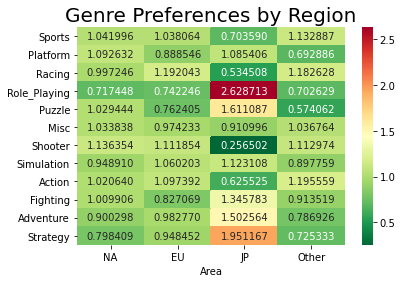

In [44]:
# df_Ratio == 지역 별로, 어떤 장르를 다른 장르 보다 더 구입했는지 저장한 변수
# == 0 전혀 구입 안 함.
# < 1 다른 장르 보다 스포츠 장르를 조금 구입 함.
# == 1 다른 장르만큼 스포츠 장르를 구입함.
# > 1 다른 장르 보다 스포츠 장르를 더 구입 함.

# annotate each cell with the numeric value of integer format
sns.heatmap(df_Ratio.T, annot=True, fmt='f', cmap='RdYlGn_r')
plt.title('Genre Preferences by Region', fontsize=20)
plt.show()

### 3.1.3 가설 검정

In [45]:
from scipy import stats

# 귀무가설 : 북미에서 장르 별 구매량 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 북미에서 장르 별 구매량 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Sports.value,
                        NA_Sales_Platform.value,
                        NA_Sales_Racing.value,
                        NA_Sales_Role_Playing.value,
                        NA_Sales_Puzzle.value,
                        NA_Sales_Misc.value,
                        NA_Sales_Shooter.value,
                        NA_Sales_Simulation.value,
                        NA_Sales_Action.value,
                        NA_Sales_Fighting.value,
                        NA_Sales_Adventure.value,
                        NA_Sales_Strategy.value)

print(f, '  ', pvalue)

22.64161979927644    1.0434058155352744e-46


In [46]:
# P-value가 0.05 보다 매우 작기 때문에 북미에서 장르 별 구매량 차이가 통계적으로 유의미하다고 볼 수 있다.

In [47]:
# 귀무가설 : 유럽에서 장르 별 구매량 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 유럽에서 장르 별 구매량 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(EU_Sales_Sports.value,
                        EU_Sales_Platform.value,
                        EU_Sales_Racing.value,
                        EU_Sales_Role_Playing.value,
                        EU_Sales_Puzzle.value,
                        EU_Sales_Misc.value,
                        EU_Sales_Shooter.value,
                        EU_Sales_Simulation.value,
                        EU_Sales_Action.value,
                        EU_Sales_Fighting.value,
                        EU_Sales_Adventure.value,
                        EU_Sales_Strategy.value)

print(f, '  ', pvalue)

14.893690601444987    3.1385036323198364e-29


In [48]:
# P-value가 0.05 보다 매우 작기 때문에 유럽에서 장르 별 구매량 차이가 통계적으로 유의미하다고 볼 수 있다.

In [49]:
# 귀무가설 : 일본에서 장르 별 구매량 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 일본에서 장르 별 구매량 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(JP_Sales_Sports.value,
                        JP_Sales_Platform.value,
                        JP_Sales_Racing.value,
                        JP_Sales_Role_Playing.value,
                        JP_Sales_Puzzle.value,
                        JP_Sales_Misc.value,
                        JP_Sales_Shooter.value,
                        JP_Sales_Simulation.value,
                        JP_Sales_Action.value,
                        JP_Sales_Fighting.value,
                        JP_Sales_Adventure.value,
                        JP_Sales_Strategy.value)

print(f, '  ', pvalue)

51.22092574705762    8.706248584418983e-112


In [50]:
# P-value가 0.05 보다 매우 작기 때문에 일본에서 장르 별 구매량 차이가 통계적으로 유의미하다고 볼 수 있다.

In [51]:
# 귀무가설 : 기타에서 장르 별 구매량 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 기타에서 장르 별 구매량 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(Other_Sales_Sports.value,
                        Other_Sales_Platform.value,
                        Other_Sales_Racing.value,
                        Other_Sales_Role_Playing.value,
                        Other_Sales_Puzzle.value,
                        Other_Sales_Misc.value,
                        Other_Sales_Shooter.value,
                        Other_Sales_Simulation.value,
                        Other_Sales_Action.value,
                        Other_Sales_Fighting.value,
                        Other_Sales_Adventure.value,
                        Other_Sales_Strategy.value)

print(f, '  ', pvalue)

12.791234134828649    1.521215667843655e-24


In [52]:
# P-value가 0.05 보다 매우 작기 때문에 기타에서 장르 별 구매량 차이가 통계적으로 유의미하다고 볼 수 있다.

In [53]:
df_preference = []# 통계적으로 유의미하게 지역 별 선호도 차이가 있는 장르 모음
# 귀무가설 : 스포츠 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 스포츠 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Sports.value / NA_Ratio, # 지역 별 스포츠 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 스포츠 게임 비중
                        EU_Sales_Sports.value / EU_Ratio,
                        JP_Sales_Sports.value / JP_Ratio,
                        Other_Sales_Sports.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 작은 0.002 이기때문에 스포츠 장르 게임의 지역 별 선호도 차이도는 통계적으로 유의미하다고 볼 수 있다.

4.79281734585968    0.0024445081201854603


In [54]:
# 귀무가설 : 플랫포머 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 플랫포머 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Platform.value / NA_Ratio, # 지역 별 플랫포머 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 플랫포머 게임 비중
                        EU_Sales_Platform.value / EU_Ratio,
                        JP_Sales_Platform.value / JP_Ratio,
                        Other_Sales_Platform.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 작은 0.011 이기때문에 플랫포머 장르 게임의 지역 별 선호도 차이도는 통계적으로 유의미하다고 볼 수 있다.

3.6765727205167296    0.011649926275241444


In [55]:
# 귀무가설 : 레이싱 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 레이싱 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Racing.value / NA_Ratio, # 지역 별 레이싱 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 레이싱 게임 비중
                        EU_Sales_Racing.value / EU_Ratio,
                        JP_Sales_Racing.value / JP_Ratio,
                        Other_Sales_Racing.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 레이싱 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

8.329259778770902    1.5987724307825822e-05


In [56]:
# 귀무가설 : 롤플레잉 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 롤플레잉 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Role_Playing.value / NA_Ratio, # 지역 별 롤플레잉 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 롤플레잉 게임 비중
                        EU_Sales_Role_Playing.value / EU_Ratio,
                        JP_Sales_Role_Playing.value / JP_Ratio,
                        Other_Sales_Role_Playing.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 롤플레잉 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

77.79381215688993    2.370145153645261e-49


In [57]:
# 귀무가설 : 퍼즐 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 퍼즐 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Puzzle.value / NA_Ratio, # 지역 별 퍼즐 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 퍼즐 게임 비중
                        EU_Sales_Puzzle.value / EU_Ratio,
                        JP_Sales_Puzzle.value / JP_Ratio,
                        Other_Sales_Puzzle.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 퍼즐 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

6.433603590541304    0.0002456523238194093


In [58]:
# 귀무가설 : 기타 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 기타 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Misc.value / NA_Ratio, # 지역 별 기타 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 기타 게임 비중
                        EU_Sales_Misc.value / EU_Ratio,
                        JP_Sales_Misc.value / JP_Ratio,
                        Other_Sales_Misc.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(0)
# P-value가 0.05 보다 큰 0.66 이기때문에 기타 장르 게임의 지역 별 선호도 차이도는 통계적으로 유의미하지 않다고 볼 수 있다.

0.5283411273896442    0.6628056567621334


In [59]:
# 귀무가설 : 슈팅 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 슈팅 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Shooter.value / NA_Ratio, # 지역 별 슈팅 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 슈팅 게임 비중
                        EU_Sales_Shooter.value / EU_Ratio,
                        JP_Sales_Shooter.value / JP_Ratio,
                        Other_Sales_Shooter.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 슈팅 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

39.1921330489991    4.876217039377033e-25


In [60]:
# 귀무가설 : 시뮬레이션 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 시뮬레이션 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Simulation.value / NA_Ratio, # 지역 별 시뮬레이션 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 시뮬레이션 게임 비중
                        EU_Sales_Simulation.value / EU_Ratio,
                        JP_Sales_Simulation.value / JP_Ratio,
                        Other_Sales_Simulation.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(0)
# P-value가 0.05 보다 큰 0.54 이기때문에 시뮬레이션 장르 게임의 지역 별 선호도 차이도는 통계적으로 유의미하지 않다고 볼 수 있다.

0.7070568652419559    0.5477109752753409


In [61]:
# 귀무가설 : 액션 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 액션 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Action.value / NA_Ratio, # 지역 별 액션 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 액션 게임 비중
                        EU_Sales_Action.value / EU_Ratio,
                        JP_Sales_Action.value / JP_Ratio,
                        Other_Sales_Action.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 액션 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

19.082822010943865    2.414460571065743e-12


In [62]:
# 귀무가설 : 대전_격투 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 대전_격투 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Fighting.value / NA_Ratio, # 지역 별 대전_격투 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 대전_격투 게임 비중
                        EU_Sales_Fighting.value / EU_Ratio,
                        JP_Sales_Fighting.value / JP_Ratio,
                        Other_Sales_Fighting.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 대전_격투 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

7.4627773758814895    5.601559326262504e-05


In [63]:
# 귀무가설 : 어드벤쳐 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 어드벤쳐 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Adventure.value / NA_Ratio, # 지역 별 어드벤쳐 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 어드벤쳐 게임 비중
                        EU_Sales_Adventure.value / EU_Ratio,
                        JP_Sales_Adventure.value / JP_Ratio,
                        Other_Sales_Adventure.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 어드벤쳐 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

10.66940916924336    5.46276696558211e-07


In [64]:
# 귀무가설 : 전략 게임의 지역 별 선호도 차이가 통계적으로 유의미하지 않다. (차이 없다.)
# 대립가설 : 전략 게임의 지역 별 선호도 차이가 통계적으로 유의미하다. (차이 있다.)
f, pvalue = stats.f_oneway(NA_Sales_Strategy.value / NA_Ratio, # 지역 별 전략 판매량 / 지역 별 비중 == 해당 지역에서 판매된 게임 중 전략 게임 비중
                        EU_Sales_Strategy.value / EU_Ratio,
                        JP_Sales_Strategy.value / JP_Ratio,
                        Other_Sales_Strategy.value / Other_Ratio)

print(f, '  ', pvalue)
df_preference.append(1)
# P-value가 0.05 보다 매우 작기때문에 전략 장르 게임의 지역 별 선호도 차이도는 통계적으로 매우 유의미하다고 볼 수 있다.

23.6623839053232    4.086708458743195e-15


In [65]:
df_preference = pd.DataFrame(df_preference).T
df_preference.columns = ['Sports', 'Platform', 'Racing', 'Role_Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
df_preference

,Sports,Platform,Racing,Role_Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,1,1,1,1,0,1,0,1,1,1,1


## 결론
지역에 따라 선호하는 게임 장르가 다릅니다.

북미, 유럽, 일본, 기타 지역 중, 특히 일본에서 장르에 따른 선호도의 차이가 크게 나타났습니다.

*   일본은 다른 지역 보다 롤플레잉 게임을 2.62배로 더 선호했고 전략 게임은 1.95배로 더 선호했습니다.
*   그리고 다른 지역에 비해 레이싱 게임의 선호도는 절반 수준이고 FPS 게임 선호도는 1/4 수준으로 FPS 게임의 불모지라고 할 수 있습니다.

가설 검정을 해보았을 때 시뮬레이션과 기타 장르는 지역 별 선호도 차이가 통계적으로 유의미하지 않았고

나머지 스포츠, 플랫포머, 레이싱, 롤플레잉, 퍼즐, FPS, 액션, 대전 격투, 어드벤쳐, 전략 장르는 지역 별 선호도 차이가 통계적으로 유의미합니다.

## 3.2 연도별 게임의 트렌드

In [66]:
# 2. 연도별 게임의 트렌드가 있을까

In [67]:
# 년도 결측치를 제거한 df 생성
df_year = df.dropna(subset=['Year'])
df_year = df_year.sort_values(by='Year') # 정렬
df_year = df_year.reset_index(drop = True)
df_year = df_year.drop(['Name', 'Platform', 'Publisher'], axis = 1)

df_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1981.0,Shooter,0.99,0.05,0.00,0.01,1.05
1,1981.0,Action,0.38,0.02,0.00,0.00,0.40
2,1981.0,Sports,0.24,0.01,0.00,0.00,0.25
3,1981.0,Shooter,0.68,0.04,0.00,0.01,0.73
4,1981.0,Shooter,1.26,0.08,0.00,0.01,1.35
...,...,...,...,...,...,...,...
16309,2016.0,Shooter,1.28,1.61,0.15,0.57,3.61
16310,2016.0,Adventure,0.01,0.01,0.00,0.00,0.02
16311,2016.0,Role_Playing,0.00,0.00,0.05,0.00,0.05
16312,2016.0,Adventure,0.00,0.00,0.02,0.00,0.02


In [68]:
import numpy as np

# df_year2 == 기존 tidy 데이터
# df_year == crosstab로 만든 년도 기준 장르 별 판매량 데이터
df_year2 = df_year.copy()
df_year = pd.crosstab(index = df_year.Year, columns = df_year.Genre, values = df_year.Total_Sales, aggfunc = np.sum ).fillna(0)

year = df_year.index.tolist()

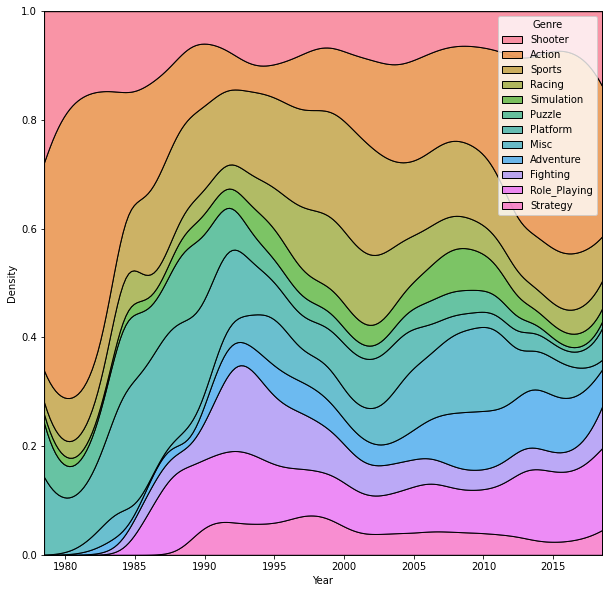

In [69]:
fig, ax = plt.subplots(figsize=(10,10))

sns.kdeplot(data=df_year2, x=df_year2.Year, hue=df_year2.Genre, multiple="fill")
# 년도 별 출시 한 게임 중 각 장르가 차지하는 비율 그래프
# 연속적이지 않은 데이터를 연속적으로 표현하니 괴리가 큰 것 같다.

In [70]:
# df_year_ratio == 년도 기준 각 장르 비중

# 신규 df 생성
df_year_ratio = []
# pd.DataFrame(df_year_ratio)

# 각 년도 별 장르 비중을 계산해서 df_year_ratio에 추가
for i in range(len(df_year)):
  genre_ratio = df_year.iloc[i] / df_year.iloc[i].sum()
  df_year_ratio.append(genre_ratio)

# 데이터프레임으로 변환
df_year_ratio = pd.DataFrame(df_year_ratio)

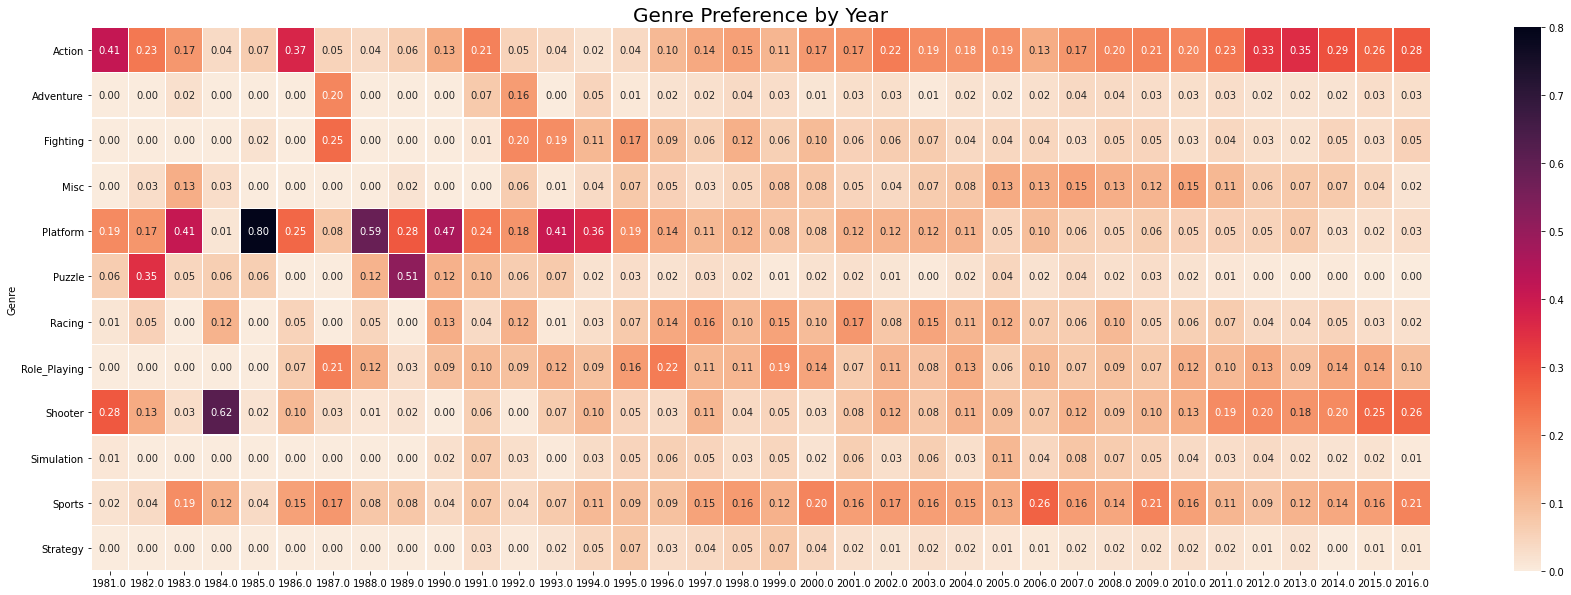

In [71]:
fig, ax = plt.subplots(figsize=(30,10))

# annotate each cell with the numeric value of integer format
sns.heatmap(df_year_ratio.T, annot=True, fmt='.2f', cmap='rocket_r', linewidths=0.5)
plt.title('Genre Preference by Year', fontsize=20)
plt.show()
# 년도 기준 출시 한 게임의 장르 별 비중 히트맵

## 결론
연도별 게임의 트렌드가 있습니다.

1980년 초에는 액션, FPS, 플랫포머 게임이 인기가 많았습니다.

1985년에 플랫포머 게임인 슈퍼마리오브라더스가 선풍적인 인기를 끌었고 추후 10년 간 플랫포머 장르의 인기가 이어졌습니다.

대전 격투 게임은 1990년 초부터 인기가 생겼고 2000년 이후로는 인기가 떨어지고 있습니다.

스포츠 게임은 꾸준히 인기를 유지하고 있습니다.

최근에는 액션, FPS, 스포츠 게임이 인기가 많습니다.

### 보기 어려운 그래프

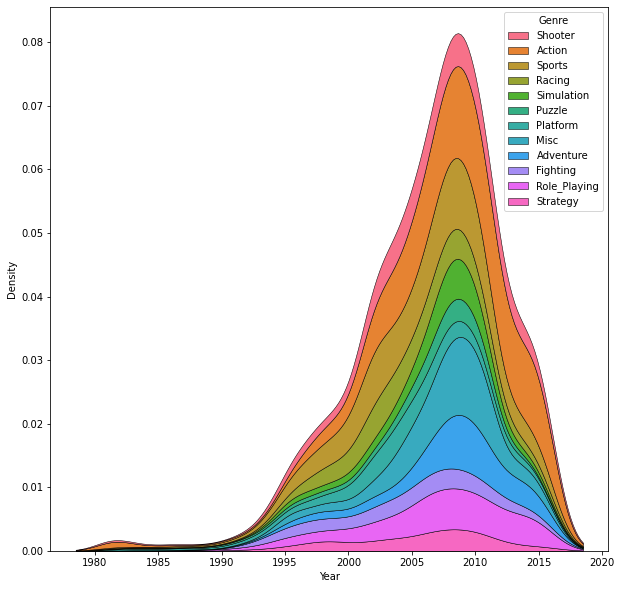

In [238]:
# 면적 그래프, 장르가 12개나 되기 때문에 난잡해서 보기 어렵다.
fig, ax = plt.subplots(figsize=(10,10))

sns.kdeplot(
   data=df_year2, x=df_year2.Year, hue=df_year2.Genre,
   fill=True, common_norm=True, multiple="stack",
   alpha=1, linewidth=.5,
)

In [ ]:
# 1981.0      46
# 1982.0      36
# 1983.0      17
# 1984.0      14
# 1985.0      14
# 1986.0      21
# 1987.0      16
# 1988.0      15
# 1989.0      17
# 1990.0      16
# 1991.0      41
# 1992.0      43
# 1993.0      60
# 1994.0     121
# 1995.0     219
# 1996.0     263
# 1997.0     289
# 1998.0     379
# 1999.0     338
# 2000.0     349
# 2001.0     482
# 2002.0     829
# 2003.0     775
# 2004.0     763
# 2005.0     941
# 2006.0    1008
# 2007.0    1202
# 2008.0    1428
# 2009.0    1431
# 2010.0    1259
# 2011.0    1139
# 2012.0     657
# 2013.0     546
# 2014.0     582
# 2015.0     614
# 2016.0     344

In [73]:
# 선 그래프, 장르가 12개나 되기 때문에 난잡해서 보기 어렵다.
# # Setting FiveThirtyEight style
# plt.style.use('fivethirtyeight')

# # Setting size of our plot
# fig, ax = plt.subplots(figsize=(10,10))
    
# # # Plotting each occupation category
# ax1 = sns.lineplot(x=year, y=df_year['Sports'].tolist(), color='#0F95D7', lw=2.5)
# ax2 = sns.lineplot(x=year, y=df_year['Platform'].tolist(), color='#FF2700', lw=2.5)
# ax3 = sns.lineplot(x=year, y=df_year['Racing'].tolist(), color='#810F7C', lw=2.5)
# ax4 = sns.lineplot(x=year, y=df_year['Role_Playing'].tolist(), color='#8977ad', lw=2.5)
# ax5 = sns.lineplot(x=year, y=df_year['Puzzle'].tolist(), color='#fdb90b', lw=2.5)
# ax6 = sns.lineplot(x=year, y=df_year['Misc'].tolist(), color='#ff00ff', lw=2.5)
# ax7 = sns.lineplot(x=year, y=df_year['Shooter'].tolist(), color='#0099a4', lw=2.5)
# ax8 = sns.lineplot(x=year, y=df_year['Simulation'].tolist(), color='#503b14', lw=2.5)
# ax9 = sns.lineplot(x=year, y=df_year['Action'].tolist(), color='#6f9e02', lw=2.5)
# ax10 = sns.lineplot(x=year, y=df_year['Fighting'].tolist(), color='#ee0205', lw=2.5)
# ax11 = sns.lineplot(x=year, y=df_year['Adventure'].tolist(), color='#0d0191', lw=2.5)
# ax12 = sns.lineplot(x=year, y=df_year['Strategy'].tolist(), color='#61fd0d', lw=2.5)

# # Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
# plt.ylim(-5,100)

# # Bolded horizontal line at y=0
# ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# # Title text
# ax.text(x=1977, y=118, s="Is there a trend in games by year?", fontsize=18.5, fontweight='semibold', color='#414141')

# # Subtitle text
# ax.text(x=1977, y=112, s='Sales of genre, by year', fontsize=16.5, color='#414141')

In [74]:
#
# Sports        스포츠
# Platform      플랫포머
# Racing        레이싱
# Role_Playing  롤플레잉
# Puzzle        퍼즐
# Misc          기타
# Shooter       슈팅
# Simulation    시뮬레이션
# Action        액션
# Fighting      대전_격투
# Adventure     어드벤쳐
# Strategy      전략

In [75]:
#
# sports        스포츠
# platform      플랫포머
# racing        레이싱
# role_Playing  롤플레잉
# puzzle        퍼즐
# misc          기타
# shooter       슈팅
# simulation    시뮬레이션
# action        액션
# fighting      대전_격투
# adventure     어드벤쳐
# strategy      전략

## 3.3 인기 게임 분석

In [76]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [77]:
# 판매량이 5백만장이 넘는 게임
df_best_game = df.loc[df['Total_Sales'] > 5]
df_best_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
122,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
223,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
384,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,1.64,2.48,0.44,0.58,5.14
511,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
...,...,...,...,...,...,...,...,...,...,...
16276,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
16475,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
16503,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
16515,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70


In [78]:
# 지역별 판매량 분석을 위한 tidy 데이터 만들기
df_bg_tidy = df_best_game.drop(['Total_Sales'], axis = 1)
df_bg_tidy = df_bg_tidy.melt(id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher'], value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_bg_tidy

,Name,Platform,Year,Genre,Publisher,variable,value
0,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,NA_Sales,5.91
1,Just Dance 3,Wii,2011.0,Misc,Ubisoft,NA_Sales,6.05
2,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,NA_Sales,1.64
3,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,NA_Sales,3.44
4,Mario Kart 64,N64,1996.0,Racing,Nintendo,NA_Sales,5.55
...,...,...,...,...,...,...,...
815,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,Other_Sales,1.03
816,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,Other_Sales,1.62
817,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,Other_Sales,0.94
818,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,Other_Sales,0.64


In [79]:
# 지역 별 합산
na_tot = df_bg_tidy.loc[df_bg_tidy['variable'] == 'NA_Sales'].value.sum()
eu_tot = df_bg_tidy.loc[df_bg_tidy['variable'] == 'EU_Sales'].value.sum()
jp_tot = df_bg_tidy.loc[df_bg_tidy['variable'] == 'JP_Sales'].value.sum()
other_tot = df_bg_tidy.loc[df_bg_tidy['variable'] == 'Other_Sales'].value.sum()

print("More than 5 million games sold")
print("NA_Total_Sales : ", na_tot)
print("EU_Total_Sales : ", eu_tot)
print("JP_Total_Sales : ", jp_tot)
print("Other_Total_Sales : ", other_tot)

More than 5 million games sold
NA_Total_Sales :  992.57
EU_Total_Sales :  616.4100000000001
JP_Total_Sales :  284.39
Other_Total_Sales :  190.02


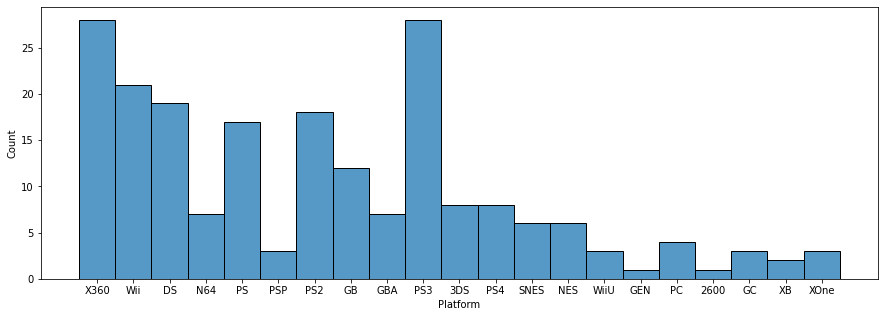

In [234]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(x=df_best_game['Platform'])

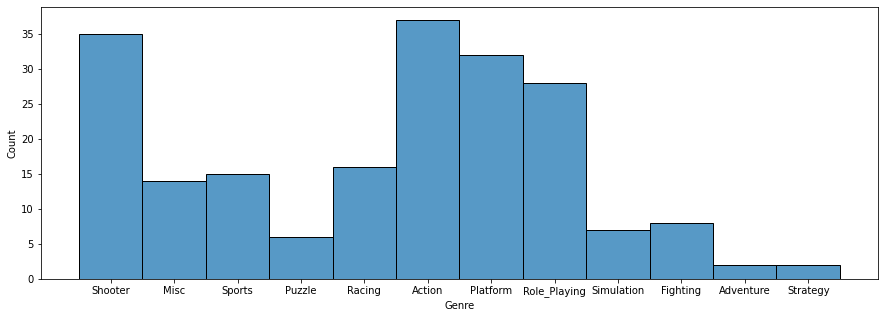

In [233]:
fig, ax = plt.subplots(figsize=(15,5))
genre = df_best_game['Genre'].dropna()
sns.histplot(x=genre)

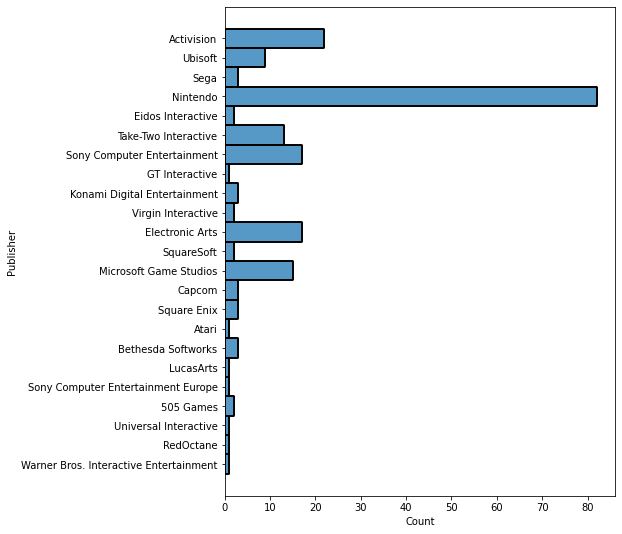

In [231]:
fig, ax = plt.subplots(figsize=(7,9))
sns.histplot(y=df_best_game['Publisher'])

In [83]:
df_top_10 = df_ranking[:10].copy()

df_top_10['Year'] = [2006, 2013, 1985, 1989, 2008, 2009, 1996, 2010, 2011, 2006]
df_top_10['Genre'] = ['Sports', 'Action', 'Platform', 'Puzzle', 'Racing', 'Sports', 'Role-Playing', 'Shooter', 'Shooter', 'Platform']
df_top_10['Publisher'] = ['Nintendo', 'Take-Two Interactive', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Activision', 'Activision', 'Nintendo']
df_top_10['Rated'] = ['G', 'R', 'G', 'G', 'G', 'G', 'G', 'R', 'R', 'G'] # G == 전체 이용가, R == 18세 이상 이용가
df_top_10

,Name,Total_Sales,Sales_Ranking,Year,Genre,Publisher,Rated
0,Wii Sports,82.74,1,2006,Sports,Nintendo,G
1,Grand Theft Auto V,55.92,2,2013,Action,Take-Two Interactive,R
2,Super Mario Bros.,45.31,3,1985,Platform,Nintendo,G
3,Tetris,35.84,4,1989,Puzzle,Nintendo,G
4,Mario Kart Wii,35.83,5,2008,Racing,Nintendo,G
5,Wii Sports Resort,33.00,6,2009,Sports,Nintendo,G
6,Pokemon Red/Pokemon Blue,31.38,7,1996,Role-Playing,Nintendo,G
7,Call of Duty: Black Ops,31.04,8,2010,Shooter,Activision,R
8,Call of Duty: Modern Warfare 3,30.84,9,2011,Shooter,Activision,R
9,New Super Mario Bros.,30.01,10,2006,Platform,Nintendo,G


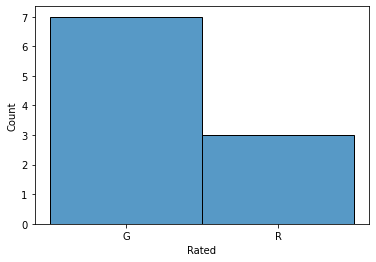

In [84]:
sns.histplot(x=df_top_10['Rated'])
# G == 전체 이용가, R == 18세 이상 이용가

In [85]:
df_nin = df_top_10.loc[df_top_10['Publisher'] == 'Nintendo']
nin_year = df_nin['Year'].sum() / len(df_nin)

df_non_nin = df_top_10.loc[df_top_10['Publisher'] != 'Nintendo']
nn_year = df_non_nin['Year'].sum() / len(df_non_nin)

print("top 10 Release date")
print("Nintendo : ",int(nin_year),"Non-Nintendo : ",int(nn_year))

top 10 Release date
Nintendo :  1999 Non-Nintendo :  2011


## 결론

판매량이 높은 게임들은 닌텐도 게임과 그 외 게임으로 양분 할 수 있습니다.

*   닌텐도 게임 - 폭넓은 유저층

> 전체 이용가 게임이 대부분이고 가족, 친구와 함께 할 수 있는 게임을 지향합니다.

> 닌텐도 게임을 해보지 않은 사람도 아는 인기 있는 캐릭터들을 보유하고 활용하고 있습니다.

> 플랫포머, 롤플레잉, 스포츠, 레이싱, 퍼즐 등 장르를 가볍게 즐길 수 있게 만듭니다.

*   그 외 게임 - 뛰어난 기술력

> 플레이스테이션, 엑스박스를 플랫폼으로 사용하는 게임이 많습니다.

> 닌텐도에 비해 플랫폼 기기의 성능이 뛰어나고 게임도 고사양이 많습니다.

> 액션, FPS 장르가 많고 큰 스케일, 자유도를 강조하는 게임이 많습니다.

> 전체 이용가를 고집하지 않고 과격한 표현이 많습니다.

## 3.4 최근 데이터 분석

In [89]:
# 2014년 ~ 2016년
# 30만장 이상 판매된 게임
df_near = df.loc[df['Year'] > 2013]
df_near = df_near.loc[df['Total_Sales'] > .3]
df_near

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03,0.33
134,Forza Horizon 2,X360,2014.0,Racing,Microsoft Game Studios,0.35,0.43,0.00,0.07,0.85
146,Fallout 4,PC,2015.0,Role_Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23
193,WWE 2K15,PS3,2014.0,Sports,Take-Two Interactive,0.36,0.35,0.00,0.14,0.85
276,One Piece: Unlimited World Red,PS3,2014.0,Action,Namco Bandai Games,0.09,0.12,0.06,0.05,0.32
...,...,...,...,...,...,...,...,...,...,...
16497,Call of Duty: Advanced Warfare,PC,2014.0,Shooter,Activision,0.14,0.23,0.00,0.04,0.41
16503,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
16548,Dead or Alive 5,PS4,2015.0,Fighting,Tecmo Koei,0.09,0.13,0.08,0.04,0.34
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


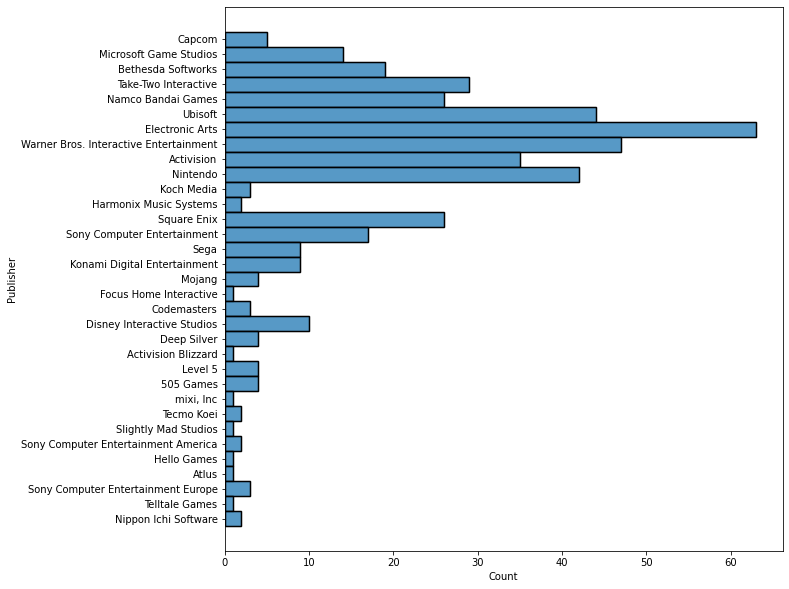

In [90]:
# 퍼블리셔 별 출시 게임 수
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(y=df_near['Publisher'])

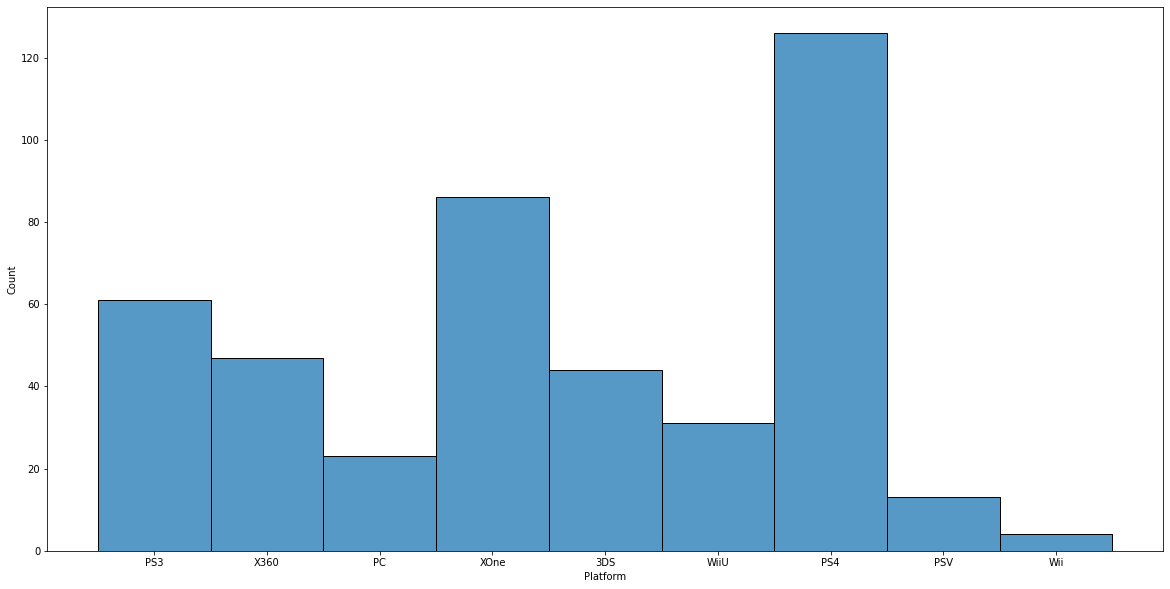

In [209]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x=df_near['Platform'])

In [136]:
# 퍼블리셔 별 판매량
df_near_pub = pd.crosstab(df_near['Publisher'], df_near['Genre'], values = df_near['Total_Sales'], aggfunc = np.sum).fillna(0)

df_near_pub_sum = pd.DataFrame(df_near_pub.sum(axis=1), columns=['Total_Sales'])
df_near_pub_sum = df_near_pub_sum.sort_values(by='Total_Sales' ,ascending=False)
df_near_pub_sum

,Total_Sales
Publisher,
Electronic Arts,101.76
Nintendo,77.06
Activision,76.62
Ubisoft,60.10
Take-Two Interactive,46.51
Warner Bros. Interactive Entertainment,40.36
Sony Computer Entertainment,32.80
Bethesda Softworks,26.52
Microsoft Game Studios,21.07


In [170]:
# 장르 별 판매량
df_near_gen_sum = pd.DataFrame(df_near_pub.T.sum(axis=1), columns=['Total_Sales'])
df_near_gen_sum = df_near_gen_sum.sort_values(by='Total_Sales' ,ascending=False)
df_near_gen_sum

,Total_Sales
Genre,
Action,147.44
Shooter,144.80
Sports,94.02
Role_Playing,72.76
Misc,29.98
Fighting,23.06
Racing,19.18
Platform,15.15
Simulation,7.14


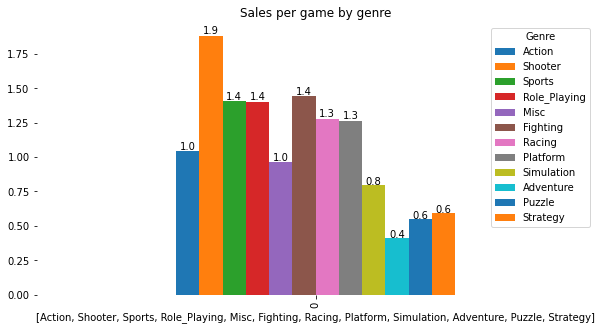

In [208]:
# 장르 별 게임 1개 당 판매량
count_genre = df_near['Genre'].value_counts()
per_one_game = df_near_gen_sum.T.values / count_genre.values
per_one_game = pd.DataFrame(per_one_game, columns=df_near_gen_sum.index)

ax = per_one_game.plot(kind='bar', title="Sales per game by genre", figsize=[10,5], xlabel=per_one_game.columns)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.show()

In [167]:
# 판매량이 4백만장이 안 되는 퍼블리셔 제거
df_near_high = df_near.copy()

df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Atlus'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Telltale Games'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Activision Blizzard'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Tecmo Koei'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Harmonix Music Systems'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'mixi, Inc'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Slightly Mad Studios'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Sony Computer Entertainment America'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Nippon Ichi Software'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Koch Media'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Focus Home Interactive'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Codemasters'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Hello Games'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == '505 Games'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Deep Silver'].index)
df_near_high = df_near_high.drop(df_near_high[df_near_high.Publisher == 'Mojang'].index)

# 퍼블리셔 줄인 데이터로 퍼블리셔 별 판매량 재생성
df_near_pub = pd.crosstab(df_near_high['Publisher'], df_near_high['Genre'], values = df_near_high['Total_Sales'], aggfunc = np.sum).fillna(0)

df_near_high

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03,0.33
134,Forza Horizon 2,X360,2014.0,Racing,Microsoft Game Studios,0.35,0.43,0.00,0.07,0.85
146,Fallout 4,PC,2015.0,Role_Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23
193,WWE 2K15,PS3,2014.0,Sports,Take-Two Interactive,0.36,0.35,0.00,0.14,0.85
276,One Piece: Unlimited World Red,PS3,2014.0,Action,Namco Bandai Games,0.09,0.12,0.06,0.05,0.32
...,...,...,...,...,...,...,...,...,...,...
16439,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14
16497,Call of Duty: Advanced Warfare,PC,2014.0,Shooter,Activision,0.14,0.23,0.00,0.04,0.41
16503,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


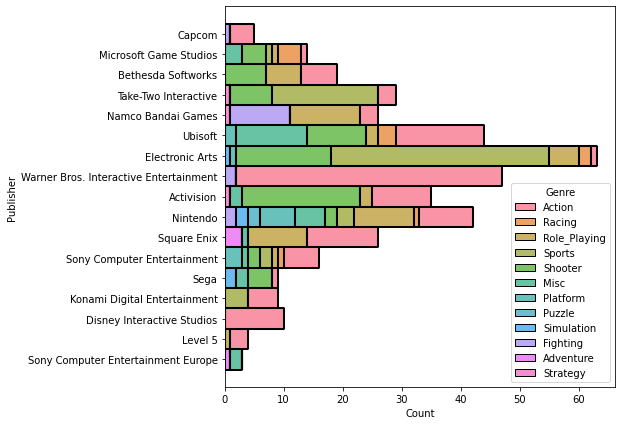

In [236]:
# 퍼블리셔 별 출시 게임 수
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(data=df_near_high, y='Publisher', hue='Genre', multiple="stack")

## 결론
데이터 셋에서 가장 최근 데이터인 2014년 ~ 2016년 데이터 중 판매량 상위 17위 회사를 보았을 때

액션 장르의 게임을 많이 만들고 있습니다.

장르 별 게임 1개 당 판매량을 보았을 때는 슈팅 장르가 가장 높았고 액션 장르는 조금 낮은 편입니다.

판매량이 가장 높은 회사는 Electronic Arts로 스포츠 장르를 주로 만드는 회사입니다.

플랫폼은 플레이스테이션, 엑스박스, 닌텐도 순으로 높았습니다.

# 4. 다음 분기에 어떤 게임을 만들 것인가

1.   어떤 장르를 선택할까?

> 앞서 살펴본 최근 데이터를 보면 액션, FPS, 스포츠 장르의 판매량이 많다는 걸 알 수 있습니다.

> 스포츠 장르의 경우 상위권 회사 중에는 Electronic Arts, Take-Two Interactive 두 회사가 주로 만들고 있고 다른 회사들은 스포츠 장르의 비중이 작습니다.

스포츠 장르로 시장에 신규 진입하는 건 어렵다고 생각됩니다.

> FPS 장르가 게임 1당 판매량이 가장 높았던 장르이기 때문에 FPS 장르를 선택하는 게 좋을 겁니다.

2.   다른 장르의 요소를 추가한다면

> 상위권 게임 중 액션 장르의 게임이 가장 많았기 때문에 액션 장르의 요소를 일부 쓰는 것도 좋을 것입니다.

3.   어느 시장을 노려야 하나

> 우선 FPS 게임의 선호도가 극도로 떨어지는 일본 시장은 피하는 게 좋습니다.

> 전체 게임 시장에 절반을 차지하는 북미 시장부터 공략하는 게 좋을 것입니다.

4.   피해야 할 요소

> 일본 외는 선호도가 낮은 롤플레잉, 전략 장르의 요소는 배제하는 게 좋습니다.

5.   플랫폼 선택

> 플레이스테이션으로 가장 먼저 출시하고, 그 다음에는 엑스박스, 닌텐도, PC 순으로 출시를 고려해볼 수 있습니다.


6.   퍼블리셔 선택

> 게임을 직접 서비스 할 수도 있겠지만 퍼블리셔를 선택해야 한다면 FPS 게임을 많이 발매한 Activision을 통해 퍼블리싱을 하는게 좋을 것입니다.